In [61]:
import matplotlib.pyplot as plt
from matplotlib.text import Text

import numpy as np

# Включение русского языка
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('font',**{'size':'18'})
rc('text', usetex=True)
rc('text.latex',unicode=True)
rc('text.latex',preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex',preamble='\\usepackage[russian]{babel}')

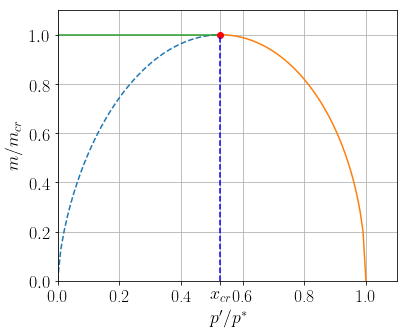

In [72]:
gamma = 1.4
xcr = (2/(gamma+1))**(gamma/(gamma-1))

def fracm(gamma, x):
    return np.sqrt( 2/(gamma-1) * 
                   ((gamma+1)/2)**((gamma+1)/(gamma-1))*
                   x**(2/gamma) * 
                  (1 - x**((gamma-1)/gamma))
                  )


xi = np.linspace(xcr, 1)
xi_fake = np.linspace(0, xcr)

fone = [1  for x in xi_fake] 

fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.set_ylabel("$m/m_{cr}$")
ax.set_xlabel("$p'/p^*$")

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.plot(xi_fake, fracm(gamma,xi_fake), '--')
ax.plot(xi, fracm(gamma,xi))
ax.plot(xi_fake, fone)



ax.plot(xcr, 1, 'ro')
ax.plot([xcr for y in np.linspace(0,1)], np.linspace(0,1), 'b--')

# # ax.plot(1, theta(1),'go')
# # ax.plot(3.2, theta(3.2),'go')

ticks = np.array([0, 0.2, 0.4, xcr, 0.6, 0.8,  1.0 ])
labels = []

for t in ticks:
    if (t != xcr):
        labels.append(Text(0,0,t))
    else:
        labels.append(Text(0,0,"$x_{cr}$"))




ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax.grid(True)

plt.tight_layout()
plt.savefig("../img/simple_nozzle_m.pdf")
